# 01 - Data Cleaning & Preprocessing
> M·ª•c ti√™u: L√†m s·∫°ch d·ªØ li·ªáu, x·ª≠ l√Ω gi√° tr·ªã thi·∫øu, m√£ h√≥a, lo·∫°i b·ªè nhi·ªÖu v√† gi√° tr·ªã ngo·∫°i l·ªá. K·∫øt qu·∫£ ƒë·∫ßu ra: File `processed.csv` ho√†n ch·ªânh, s·∫µn s√†ng ƒë·ªÉ hu·∫•n luy·ªán m√¥ h√¨nh.

## 1.1: Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib

## 1.2: ƒê·ªçc d·ªØ li·ªáu

In [101]:
# ƒê·ªçc file CSV t·ª´ th∆∞ m·ª•c data/
df = pd.read_csv("../data/raw/train.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # Lo·∫°i b·ªè kho·∫£ng tr·∫Øng th·ª´a trong t√™n c·ªôt
df.head()

id      name  gender   age           city working_professional_or_student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         profession  academic_pressure  work_pressure  cgpa  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   study_satisfaction  job_satisfaction     sleep_duration dietary_habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    degree have_you_ever_had_suicidal_thoughts_?  work/study_hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   financial_stress family_history_of_mental_illness  depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

### chuy·ªÉn c·ªôt age sang d·∫°ng int 32

In [102]:
df['age'] = df['age'].astype('int32')


## 1.3: L·ªçc ra gi√° tr·ªã h·ªçc sinh c√≥ tu·ªïi t·ª´ 18-24 v√† ch∆∞a ƒëi l√†m

In [103]:
df = df[df['working_professional_or_student'] == 'Student'].copy()
df = df[(df['age'] >= 18) & (df['age'] <= 24)]
print(f"S·ªë d√≤ng c√≤n l·∫°i sau l·ªçc: {len(df)}")

S·ªë d√≤ng c√≤n l·∫°i sau l·ªçc: 12173


## 1.4: Ki·ªÉm tra th√¥ng tin d·ªØ li·ªáu

In [104]:

# T·ªïng quan v·ªÅ d·ªØ li·ªáu
df.info()

# Ki·ªÉm tra gi√° tr·ªã thi·∫øu
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 12173 entries, 8 to 140690
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     12173 non-null  int64  
 1   name                                   12173 non-null  object 
 2   gender                                 12173 non-null  object 
 3   age                                    12173 non-null  int32  
 4   city                                   12173 non-null  object 
 5   working_professional_or_student        12173 non-null  object 
 6   profession                             12 non-null     object 
 7   academic_pressure                      12167 non-null  float64
 8   work_pressure                          2 non-null      float64
 9   cgpa                                   12168 non-null  float64
 10  study_satisfaction                     12166 non-null  float64
 11  job_sa

id                                           0
name                                         0
gender                                       0
age                                          0
city                                         0
working_professional_or_student              0
profession                               12161
academic_pressure                            6
work_pressure                            12171
cgpa                                         5
study_satisfaction                           7
job_satisfaction                         12168
sleep_duration                               0
dietary_habits                               1
degree                                       0
have_you_ever_had_suicidal_thoughts_?        0
work/study_hours                             0
financial_stress                             1
family_history_of_mental_illness             0
depression                                   0
dtype: int64

In [105]:
(df['depression'].isin([0])).sum()

3848

## 1.5:Lo·∫°i b·ªè c√°c thu·ªôc t√≠nh d∆∞ th·ª´a

### 1.5.1: Lo·∫°i b·ªè c·ªôt kh√¥ng c√≥ gi√° tr·ªã h·ªçc m√°y

In [106]:
cols_to_drop = ['id','name','working_professional_or_student','work_pressure', 'job_satisfaction','profession']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
df.head(10)

gender  age       city  academic_pressure  cgpa  study_satisfaction  \
8    Female   24  Bangalore                2.0  5.90                 5.0   
83     Male   24     Nagpur                3.0  6.10                 3.0   
100  Female   19     Rajkot                2.0  8.52                 4.0   
103  Female   19     Kalyan                5.0  5.64                 5.0   
132  Female   20  Ahmedabad                5.0  7.25                 3.0   
139    Male   19    Chennai                2.0  7.83                 2.0   
172    Male   23      Thane                1.0  8.59                 4.0   
173    Male   18  Bangalore                4.0  7.10                 3.0   
176  Female   20     Mumbai                5.0  8.58                 5.0   
222    Male   18      Surat                4.0  6.70                 5.0   

        sleep_duration dietary_habits    degree  \
8            5-6 hours       Moderate       BSc   
83           5-6 hours       Moderate  Class 12   
100  Less than 5 hours      Unhealthy  Class 12   
103  Less than 5 hours       Moderate  Class 12   
132          5-6 hours        Healthy  Class 12   
139          7-8 hours      Unhealthy  Class 12   
172          7-8 hours        Healthy       BHM   
173  More than 8 hours      Unhealthy  Class 12   
176          7-8 hours       Moderate  Class 12   
222  Less than 5 hours       Moderate  Class 12   

    have_you_ever_had_suicidal_thoughts_?  work/study_hours  financial_stress  \
8                                      No               3.0               2.0   
83                                    Yes              11.0               1.0   
100                                    No               6.0               2.0   
103                                   Yes               4.0               5.0   
132                                   Yes              10.0               3.0   
139                                    No               6.0               3.0   
172                                    No              11.0               3.0   
173                                   Yes              11.0               5.0   
176                                    No               2.0               2.0   
222                                   Yes               5.0               4.0   

    family_history_of_mental_illness  depression  
8                                Yes           0  
83                               Yes           1  
100                              Yes           0  
103                              Yes           1  
132                               No           1  
139                               No           0  
172                               No           0  
173                              Yes           1  
176                              Yes           1  
222                              Yes           1

### 1.5.2: Lo·∫°i b·ªè c√°c th√¥ng tin sai l·ªách

In [107]:
# 1. Lo·∫°i b·ªè c√°c t√™n th√†nh ph·ªë sai l·ªách
invalid_cities = ['3.0', 'Mira', 'Vaanya', 'Harsh', 'Reyansh',
                'Bhavna', 'Kibara', 'Rashi', 'Nalini']

df = df[~df['city'].isin(invalid_cities)]
# 2. L√†m s·∫°ch c·ªôt 'sleep_duration'
invalid_sleep = ['10-11 hours','2-3 hours','55-66 hours','3-4 hours']
df = df[~df['sleep_duration'].isin(invalid_sleep)]
#3 . L√†m s·∫°ch c·ªôt 'dietary_habits'
invalid_diet = ['3', 'Mihir', 'Yes']
df = df[~df['dietary_habits'].isin(invalid_diet)]

# 4. L√†m s·∫°ch c·ªôt 'degree'
invalid_degrees = ['Bhopal', '20', 'M', 'P.Com', '7.06', '24', '8.56', 'Mthanya', '0']
df = df[~df['degree'].isin(invalid_degrees)]

## 1.6: √Ånh x·∫° Vi·ªát h√≥a

### 1.6.1 √Ånh x·∫° th√†nh ph·ªë v√† g√°n gi√° tr·ªã theo c·∫•p ƒë·ªô ƒë√¥ th·ªã

In [108]:
# C·∫•p ƒë·ªô ƒë√¥ th·ªã ·∫§n ƒê·ªô
city_level_map = {
    # S - Si√™u ƒë√¥ th·ªã
    'Mumbai': 'S',
    'Delhi': 'S',

    # I - ƒê√¥ th·ªã trung t√¢m
    'Bangalore': 'I', 'Kolkata': 'I', 'Chennai': 'I', 'Hyderabad': 'I',

    # II - C√¥ng nghi·ªáp / Kinh t·∫ø l·ªõn
    'Pune': 'II', 'Ahmedabad': 'II', 'Surat': 'II', 'Kanpur': 'II',

    # III - Th·ªß ph·ªß & V√πng
    'Lucknow': 'III', 'Jaipur': 'III', 'Nagpur': 'III', 'Indore': 'III',
    'Patna': 'III', 'Bhopal': 'III', 'Visakhapatnam': 'III',

    # IV - V·ªá tinh & CN nh·ªè
    'Thane': 'IV', 'Ghaziabad': 'IV', 'Faridabad': 'IV', 'Vadodara': 'IV',
    'Meerut': 'IV', 'Nashik': 'IV', 'Kalyan': 'IV', 'Vasai-Virar': 'IV',
    'Rajkot': 'IV', 'Ludhiana': 'IV',

    # V - ƒê·∫∑c th√π
    'Srinagar': 'V', 'Varanasi': 'V', 'Agra': 'V'
}
vn_city_groups = {
    'ƒê·∫∑c Bi·ªát': ['H√† N·ªôi', 'TP. H·ªì Ch√≠ Minh'],
    'I': ['H·∫£i Ph√≤ng', 'ƒê√† N·∫µng', 'C·∫ßn Th∆°'],
    'II': ['B√¨nh D∆∞∆°ng', 'ƒê·ªìng Nai', 'B√† R·ªãa - V≈©ng T√†u', 'B·∫Øc Ninh', 'Qu·∫£ng Ninh', 'Vƒ©nh Ph√∫c', 'Th√°i Nguy√™n', 'H·∫£i D∆∞∆°ng'],
    'III': ['Thanh H√≥a', 'Ngh·ªá An', 'Kh√°nh H√≤a', 'Th·ª´a Thi√™n Hu·∫ø', 'Long An', 'Ti·ªÅn Giang', 'B·∫Øc Giang', 'Qu·∫£ng Nam', 'B√¨nh ƒê·ªãnh', 'ƒê·∫Øk L·∫Øk'],
    'IV': ['Th√°i B√¨nh', 'H∆∞ng Y√™n', 'Nam ƒê·ªãnh', 'H√† Nam', 'Ninh B√¨nh',
           'B√¨nh Thu·∫≠n', 'Ph√∫ Y√™n', 'Qu·∫£ng Ng√£i', 'H√† Tƒ©nh', 'Qu·∫£ng B√¨nh', 'Qu·∫£ng Tr·ªã', 'Ninh Thu·∫≠n',
           'An Giang', 'Ki√™n Giang', 'B·∫øn Tre', 'Vƒ©nh Long', 'Tr√† Vinh', 'S√≥c TrƒÉng', 'B·∫°c Li√™u', 'C√† Mau', 'H·∫≠u Giang'],
    'V': ['H√† Giang', 'Cao B·∫±ng', 'B·∫Øc K·∫°n', 'L·∫°ng S∆°n', 'Tuy√™n Quang', 'Y√™n B√°i', 'L√†o Cai', 'Lai Ch√¢u',
          'ƒêi·ªán Bi√™n', 'S∆°n La', 'H√≤a B√¨nh', 'Kon Tum', 'Gia Lai', 'ƒê·∫Øk N√¥ng', 'L√¢m ƒê·ªìng', 'B√¨nh Ph∆∞·ªõc', 'T√¢y Ninh'],
    'Di s·∫£n': ['Hu·∫ø', 'Qu·∫£ng Nam', 'L√¢m ƒê·ªìng', 'Ninh B√¨nh']
}


### 1.6.2: Vi·∫øt h√†m √°nh x·∫° x√°c su·∫•t theo quy t·∫Øc c·ªßa t·ª´ng c·∫•p ƒë·ªô

In [109]:
import random

def map_indian_city_to_vietnamese(city):
    level = city_level_map.get(city)
    if not level:
        return "Kh√°c"

    if level == 'S':
        choices = vn_city_groups['ƒê·∫∑c Bi·ªát'] * 7 + vn_city_groups['I'] * 2 + vn_city_groups['II']
    elif level == 'I':
        choices = vn_city_groups['ƒê·∫∑c Bi·ªát'] * 4 + (vn_city_groups['I'] + vn_city_groups['II']) * 4 + vn_city_groups['III'] * 2
    elif level == 'II':
        choices = vn_city_groups['II'] * 5 + (vn_city_groups['I'] + vn_city_groups['ƒê·∫∑c Bi·ªát']) * 3 + vn_city_groups['III'] * 2
    elif level == 'III':
        choices = vn_city_groups['III'] * 4 + vn_city_groups['IV'] * 3 + vn_city_groups['II'] * 2 + (vn_city_groups['I'] + vn_city_groups['ƒê·∫∑c Bi·ªát'])
    elif level == 'IV':
        choices = vn_city_groups['IV'] * 5 + vn_city_groups['III'] * 3 + vn_city_groups['V'] + vn_city_groups['II']
    elif level == 'V':
        choices = vn_city_groups['Di s·∫£n'] * 6 + (vn_city_groups['IV'] + vn_city_groups['III']) * 3 + ['Kh√°c']
    else:
        return "Kh√°c"

    return random.choice(choices)


### 1.6.3: √Ånh x·∫° sang b·∫±ng c·∫•p Vi·ªát Nam

In [110]:
degree_mapping = {
    # Ph·ªï th√¥ng
    'Class 12': 'T·ªët nghi·ªáp THPT',
    # C·ª≠ nh√¢n
    'BA': 'C·ª≠ nh√¢n X√£ h·ªôi & Nh√¢n vƒÉn',
    'BSc': 'C·ª≠ nh√¢n Khoa h·ªçc T·ª± nhi√™n',
    'B.Com': 'C·ª≠ nh√¢n Th∆∞∆°ng m·∫°i / Kinh t·∫ø',
    'BBA': 'C·ª≠ nh√¢n Qu·∫£n tr·ªã Kinh doanh',
    'BCA': 'C·ª≠ nh√¢n CNTT',
    'BHM': 'C·ª≠ nh√¢n Qu·∫£n l√Ω Kh√°ch s·∫°n',
    'B.Ed': 'C·ª≠ nh√¢n S∆∞ ph·∫°m',
    'LLB': 'C·ª≠ nh√¢n Lu·∫≠t',
    'BE': 'K·ªπ s∆∞',
    'B.Tech': 'K·ªπ s∆∞ C√¥ng ngh·ªá',
    'B.Arch': 'Ki·∫øn tr√∫c s∆∞',
    'B.Pharm': 'D∆∞·ª£c sƒ© ƒê·∫°i h·ªçc',
    'MBBS': 'B√°c sƒ© ƒêa khoa',
    # Th·∫°c sƒ©
    'MA': 'Th·∫°c sƒ© X√£ h·ªôi & Nh√¢n vƒÉn',
    'MSc': 'Th·∫°c sƒ© Khoa h·ªçc T·ª± nhi√™n',
    'M.Com': 'Th·∫°c sƒ© Th∆∞∆°ng m·∫°i',
    'MBA': 'Th·∫°c sƒ© Qu·∫£n tr·ªã Kinh doanh',
    'MCA': 'Th·∫°c sƒ© CNTT',
    'MHM': 'Th·∫°c sƒ© Qu·∫£n l√Ω Kh√°ch s·∫°n',
    'M.Ed': 'Th·∫°c sƒ© Gi√°o d·ª•c',
    'LLM': 'Th·∫°c sƒ© Lu·∫≠t',
    'ME': 'Th·∫°c sƒ© K·ªπ thu·∫≠t',
    'M.Tech': 'Th·∫°c sƒ© K·ªπ thu·∫≠t C√¥ng ngh·ªá',
    'M.Pharm': 'Th·∫°c sƒ© D∆∞·ª£c h·ªçc',
    'MD': 'B√°c sƒ© Chuy√™n khoa',
    # Ti·∫øn sƒ©
    'PhD': 'Ti·∫øn sƒ©',
    # Kh√°c
    'Others': 'Kh√°c'
}


### 1.6.4: √Ånh x·∫° Sleep Duration

In [111]:
sleep_duration_mapping = {
    'Less than 5 hours': 'D∆∞·ªõi 5 ti·∫øng',
    '5-6 hours': '5-6 ti·∫øng',
    '7-8 hours': '7-8 ti·∫øng',
    'More than 8 hours': 'H∆°n 8 ti·∫øng'
    # 'Others': 'Kh√°c'
}

### 1.6.5: √Ånh x·∫° Dietary Habits

In [112]:
dietary_habits_mapping = {
    'Others': 'Kh√°c',
    'Unhealthy': 'Kh√¥ng l√†nh m·∫°nh',
    'Moderate': 'Trung b√¨nh',
    'Healthy': 'L√†nh m·∫°nh'
}

### 1.6.6: C·∫≠p nh·∫≠t dataframe

In [113]:
df['city'] = df['city'].apply(map_indian_city_to_vietnamese)
df['degree'] = df['degree'].map(degree_mapping)
df['sleep_duration'] = df['sleep_duration'].map(sleep_duration_mapping)
df['dietary_habits'] = df['dietary_habits'].map(dietary_habits_mapping)

In [114]:
df.head()

gender  age         city  academic_pressure  cgpa  study_satisfaction  \
8    Female   24  Th√°i Nguy√™n                2.0  5.90                 5.0   
83     Male   24      H√† Tƒ©nh                3.0  6.10                 3.0   
100  Female   19    Th√°i B√¨nh                2.0  8.52                 4.0   
103  Female   19    Qu·∫£ng Tr·ªã                5.0  5.64                 5.0   
132  Female   20   B√¨nh D∆∞∆°ng                5.0  7.25                 3.0   

    sleep_duration   dietary_habits                     degree  \
8        5-6 ti·∫øng       Trung b√¨nh  C·ª≠ nh√¢n Khoa h·ªçc T·ª± nhi√™n   
83       5-6 ti·∫øng       Trung b√¨nh            T·ªët nghi·ªáp THPT   
100   D∆∞·ªõi 5 ti·∫øng  Kh√¥ng l√†nh m·∫°nh            T·ªët nghi·ªáp THPT   
103   D∆∞·ªõi 5 ti·∫øng       Trung b√¨nh            T·ªët nghi·ªáp THPT   
132      5-6 ti·∫øng        L√†nh m·∫°nh            T·ªët nghi·ªáp THPT   

    have_you_ever_had_suicidal_thoughts_?  work/study_hours  financial_stress  \
8                                      No               3.0               2.0   
83                                    Yes              11.0               1.0   
100                                    No               6.0               2.0   
103                                   Yes               4.0               5.0   
132                                   Yes              10.0               3.0   

    family_history_of_mental_illness  depression  
8                                Yes           0  
83                               Yes           1  
100                              Yes           0  
103                              Yes           1  
132                               No           1

## 1.7: X·ª≠ l√Ω ngo·∫°i l·ªá v·ªõi IQR (Interquartile Range)

In [115]:
def remove_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data
numeric_cols = ['age','cgpa', 'academic_pressure', 'study_satisfaction',
                'work/study_hours', 'financial_stress']

df = remove_outliers_iqr(df, numeric_cols)

## 1.8: X·ª≠ l√Ω gi√° tr·ªã thi·∫øu nh·ªè h∆°n 5%

In [116]:
for col in df.columns:
    missing_ratio = df[col].isnull().sum() / len(df)
    if 0 < missing_ratio < 0.05:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].mean())

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12140 entries, 8 to 140690
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 12140 non-null  object 
 1   age                                    12140 non-null  int32  
 2   city                                   12140 non-null  object 
 3   academic_pressure                      12140 non-null  float64
 4   cgpa                                   12140 non-null  float64
 5   study_satisfaction                     12140 non-null  float64
 6   sleep_duration                         12140 non-null  object 
 7   dietary_habits                         12140 non-null  object 
 8   degree                                 12140 non-null  object 
 9   have_you_ever_had_suicidal_thoughts_?  12140 non-null  object 
 10  work/study_hours                       12140 non-null  float64
 11  financ

In [118]:
df.head()

gender  age         city  academic_pressure  cgpa  study_satisfaction  \
8    Female   24  Th√°i Nguy√™n                2.0  5.90                 5.0   
83     Male   24      H√† Tƒ©nh                3.0  6.10                 3.0   
100  Female   19    Th√°i B√¨nh                2.0  8.52                 4.0   
103  Female   19    Qu·∫£ng Tr·ªã                5.0  5.64                 5.0   
132  Female   20   B√¨nh D∆∞∆°ng                5.0  7.25                 3.0   

    sleep_duration   dietary_habits                     degree  \
8        5-6 ti·∫øng       Trung b√¨nh  C·ª≠ nh√¢n Khoa h·ªçc T·ª± nhi√™n   
83       5-6 ti·∫øng       Trung b√¨nh            T·ªët nghi·ªáp THPT   
100   D∆∞·ªõi 5 ti·∫øng  Kh√¥ng l√†nh m·∫°nh            T·ªët nghi·ªáp THPT   
103   D∆∞·ªõi 5 ti·∫øng       Trung b√¨nh            T·ªët nghi·ªáp THPT   
132      5-6 ti·∫øng        L√†nh m·∫°nh            T·ªët nghi·ªáp THPT   

    have_you_ever_had_suicidal_thoughts_?  work/study_hours  financial_stress  \
8                                      No               3.0               2.0   
83                                    Yes              11.0               1.0   
100                                    No               6.0               2.0   
103                                   Yes               4.0               5.0   
132                                   Yes              10.0               3.0   

    family_history_of_mental_illness  depression  
8                                Yes           0  
83                               Yes           1  
100                              Yes           0  
103                              Yes           1  
132                               No           1

In [119]:
df['dietary_habits'].unique()


array(['Trung b√¨nh', 'Kh√¥ng l√†nh m·∫°nh', 'L√†nh m·∫°nh'], dtype=object)

## 1.9: M√£ h√≥a d·ªØ li·ªáu ph√¢n lo·∫°i

In [120]:
# L√†m s·∫°ch tr∆∞·ªõc khi map (cho t·∫•t c·∫£ c·ªôt nh·ªã ph√¢n)
for col in ['gender', 'have_you_ever_had_suicidal_thoughts_?', 'family_history_of_mental_illness']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()
# M√£ h√≥a c√°c c·ªôt nh·ªã ph√¢n
binary_map = {
    'gender': {'male': 1, 'female': 0},
    'have_you_ever_had_suicidal_thoughts_?': {'yes': 1, 'no': 0},
    'family_history_of_mental_illness': {'yes': 1, 'no': 0}
}

for col, mapping in binary_map.items():
    df[col] = df[col].map(mapping)

# Label Encoding c√°c c·ªôt c√≤n l·∫°i
multi_cat_cols = ['city', 'degree', 'sleep_duration', 'dietary_habits']

label_encoders = {}
for col in multi_cat_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
joblib.dump(label_encoders, '../models/label_encoders.pkl')

['../models/label_encoders.pkl']

In [121]:
df.head()

gender  age  city  academic_pressure  cgpa  study_satisfaction  \
8         0   24    49                2.0  5.90                 5.0   
83        1   24    19                3.0  6.10                 3.0   
100       0   19    48                2.0  8.52                 4.0   
103       0   19    43                5.0  5.64                 5.0   
132       0   20     2                5.0  7.25                 3.0   

     sleep_duration  dietary_habits  degree  \
8                 0               2       3   
83                0               2      26   
100               2               0      26   
103               2               2      26   
132               0               1      26   

     have_you_ever_had_suicidal_thoughts_?  work/study_hours  \
8                                        0               3.0   
83                                       1              11.0   
100                                      0               6.0   
103                                      1               4.0   
132                                      1              10.0   

     financial_stress  family_history_of_mental_illness  depression  
8                 2.0                                 1           0  
83                1.0                                 1           1  
100               2.0                                 1           0  
103               5.0                                 1           1  
132               3.0                                 0           1

## 1.10: Ki·ªÉm tra l·∫ßn cu·ªëi & l∆∞u d·ªØ li·ªáu ƒë√£ x·ª≠ l√Ω

In [122]:
print("D·ªØ li·ªáu sau x·ª≠ l√Ω:")
print(df.info())
# L∆∞u l·∫°i d·ªØ li·ªáu s·∫°ch ƒë·ªÉ d√πng cho b∆∞·ªõc ti·∫øp theo
df.to_csv("../data/processed/processed.csv", index=False)
print("ƒê√£ l∆∞u file: data/processed/processed.csv")


D·ªØ li·ªáu sau x·ª≠ l√Ω:
<class 'pandas.core.frame.DataFrame'>
Index: 12140 entries, 8 to 140690
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 12140 non-null  int64  
 1   age                                    12140 non-null  int32  
 2   city                                   12140 non-null  int32  
 3   academic_pressure                      12140 non-null  float64
 4   cgpa                                   12140 non-null  float64
 5   study_satisfaction                     12140 non-null  float64
 6   sleep_duration                         12140 non-null  int32  
 7   dietary_habits                         12140 non-null  int32  
 8   degree                                 12140 non-null  int32  
 9   have_you_ever_had_suicidal_thoughts_?  12140 non-null  int64  
 10  work/study_hours                       12140 non

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


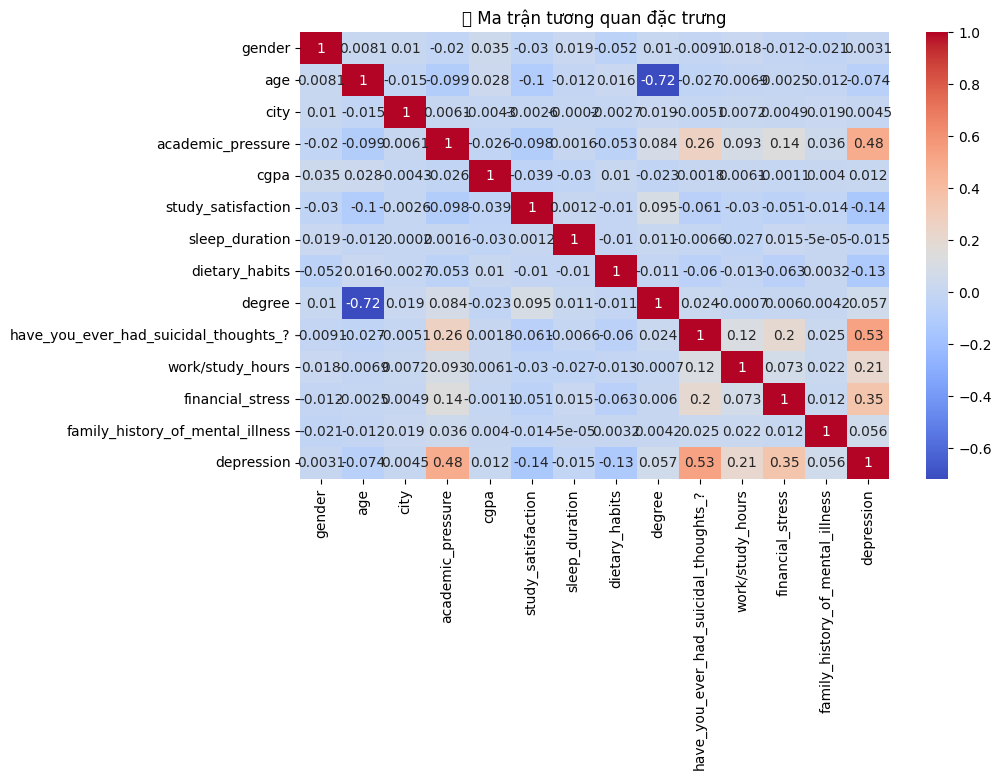

In [123]:
#Ki·ªÉm tra t∆∞∆°ng quan s∆° b·ªô
plt.figure(figsize=(9.5, 5.8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("üîç Ma tr·∫≠n t∆∞∆°ng quan ƒë·∫∑c tr∆∞ng")
plt.show()

In [124]:
# T√°ch X v√† y
from sklearn.model_selection import train_test_split
X = df.drop('depression', axis=1)
y = df['depression']

# T√°ch 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.to_csv("../data/processed/X_train.csv", index=False)
X_test.to_csv("../data/processed/X_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

print(" ƒê√£ l∆∞u X_train, X_test, y_train, y_test v√†o th∆∞ m·ª•c /data/")

 ƒê√£ l∆∞u X_train, X_test, y_train, y_test v√†o th∆∞ m·ª•c /data/
